<a href="https://colab.research.google.com/github/jaya-shankar/DSS_project/blob/main/model_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## setting up enviroment

In [ ]:
!pip install tensorflow_decision_forests
!pip install wurlitzer

     |████████████████████████████████| 15.8 MB 21.3 MB/s 
     |████████████████████████████████| 511.7 MB 4.0 kB/s 
     |████████████████████████████████| 5.8 MB 43.0 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 
     |████████████████████████████████| 438 kB 62.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers


In [ ]:
!rm -rf DSS_project
!git clone https://github.com/jaya-shankar/DSS_project.git

Cloning into 'DSS_project'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 235 (delta 2), reused 0 (delta 0), pack-reused 226
Receiving objects: 100% (235/235), 34.29 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [59]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras


In [ ]:
root_path = "/content/DSS_project/sample-ds"
raw_path = "/content/DSS_project/raw_datasets"


## fetching dataset

In [ ]:
df = pd.read_csv(root_path+"/final_combined_df.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,above_65,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator
0,WA,2021-01-12,2292.0,76.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,17689.0,978.0,0.0,111.0
1,WA,2021-01-13,2327.0,40.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,22625.0,979.0,0.0,93.0
2,WA,2021-01-14,2437.0,40.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,0.0,983.0,0.0,93.0
3,WA,2021-01-15,2161.0,23.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,31581.0,966.0,0.0,105.0
4,WA,2021-01-17,2400.0,0.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,0.0,889.0,0.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,171.0,4.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1025162.0,141.0,39.0,20.0
22341,WV,2022-04-06,107.0,25.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1026240.0,127.0,34.0,19.0
22342,WV,2022-04-07,87.0,8.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1026528.0,125.0,35.0,20.0
22343,WV,2022-04-08,92.0,4.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1026847.0,116.0,33.0,16.0


## Normalizing the dataset

In [ ]:
no_normalization_columns = {'date','state_code','lat','long'}
nor_df = df.copy()
columns = list(df.columns)
for column in columns:
  if column in no_normalization_columns:
    continue
  nor_df[column] = (nor_df[column] - nor_df[column].min())/(nor_df[column].max() - nor_df[column].min())*100
nor_df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,above_65,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242


In [ ]:
nor_df['cases'].max()

100.0

In [ ]:
nor_df.columns

Index(['state_code', 'date', 'cases', 'deaths', 'lat', 'long',
       'no_of_hospitals', 'miles_of_road', 'percent_democrat', 'population',
       'avg_income', 'mean_travel_time', 'above_65', 'percent_white',
       'persons_per_household', 'percent_in_poverty', 'avg_wind_speed',
       'avg_temp', 'people_fully_vaccinated', 'CurrentHospitalizations',
       'CurrentlyInICU', 'CurrentlyOnVentilator'],
      dtype='object')

## Assigning Importance

In [ ]:
#dp_w -> decsion paratmeter weight
dp_w = {
                      "cases" : 0.3,
                     "deaths" : 0.2,
    "CurrentHospitalizations" : 0.085,
             "CurrentlyInICU" : 0.08,
      "CurrentlyOnVentilator" : 0.03,
    "people_fully_vaccinated" : 0.05,
            "no_of_hospitals" : 0.05,

                 "population" : 0.04,
      "persons_per_household" : 0.0025,
                   "above_65" : 0.03,

                 "avg_income" : 0.0025,
         "percent_in_poverty" : 0.025,

           "mean_travel_time" : 0.0025,

              "miles_of_road" : 0.0025,

             "avg_wind_speed" : 0.02,
                   "avg_temp" : 0.03,

           "percent_democrat" : 0.02,

              "percent_white" : 0.03,    
}

sum=0
for i in dp_w:
  sum+=dp_w[i]
sum

1.0

In [ ]:
nor_df['risk_level'].value_counts(bins=5, sort=False)

(1.5330000000000001, 10.6]    19561
(10.6, 19.62]                  2230
(19.62, 28.641]                  76
(28.641, 37.661]                 22
(37.661, 46.681]                  5
Name: risk_level, dtype: int64

In [ ]:
# Ranking the risk level
risk_level = {1: 7,
              2: 9,
              3: 20,
              4: 30,
              5: 56
            }

def decide_category(x):
  if x<=risk_level[1]:
    return 1
  elif x<=risk_level[2]:
    return 2
  elif x<=risk_level[3]:
    return 3
  elif x<=risk_level[4]:
    return 4
  else:
    return 5

## Adding risk level for existing dataset

In [ ]:
nor_df['risk_level'] = (nor_df['cases']*dp_w['cases']+
                    nor_df['deaths']*dp_w['deaths']+
                    nor_df['CurrentHospitalizations']*dp_w['CurrentHospitalizations']+
                    nor_df['CurrentlyInICU']*dp_w['CurrentlyInICU']+
                    nor_df['CurrentlyOnVentilator']*dp_w['CurrentlyOnVentilator']+
                    (1-nor_df['people_fully_vaccinated'])*dp_w['people_fully_vaccinated']+
                    (1-nor_df['no_of_hospitals'])*dp_w['no_of_hospitals']+
                    nor_df['population']*dp_w['population']+
                    nor_df['persons_per_household']*dp_w['persons_per_household']+
                    nor_df['above_65']*dp_w['above_65']+
                    nor_df['avg_income']*dp_w['avg_income']+
                    nor_df['percent_in_poverty']*dp_w['percent_in_poverty']+
                    nor_df['mean_travel_time']*dp_w['mean_travel_time']+
                    (1-nor_df['miles_of_road'])*dp_w['miles_of_road']+
                    nor_df['avg_wind_speed']*dp_w['avg_wind_speed']+
                    nor_df['avg_temp']*dp_w['avg_temp']+
                    nor_df['percent_democrat']*dp_w['percent_democrat']+
                    nor_df['percent_white']*dp_w['percent_white'])


In [ ]:
nor_df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator,risk_level
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117,8.318994
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720,7.983054
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720,8.002831
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651,7.861659
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266,7.866810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553,10.095928
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975,10.235437
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553,10.104151
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242,10.054268


In [ ]:
nor_df.dropna(inplace=True)
nor_df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator,risk_level
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117,8.386452
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720,8.050581
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720,8.070634
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651,7.928289
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266,7.928128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553,10.105653
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975,10.244196
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553,10.112773
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242,10.062269


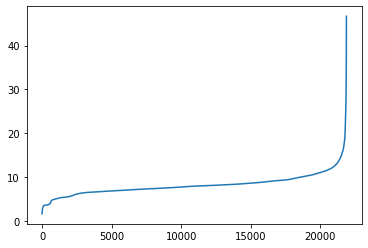

In [ ]:
#For one column
import matplotlib.pyplot as plt
df_cpy = nor_df.copy()
df_cpy.sort_values(by=['risk_level'], inplace=True)
df_cpy.reset_index(drop=True, inplace=True)
df_cpy['risk_level'].plot()
plt.show()
# #For Multiple Columns
# import matplotlib.pyplot as plt
# df[['Name Of Column1', 'Name Of Column2']].plot()
# plt.show()

In [ ]:
df_cpy

In [ ]:
df['risk_level'] =nor_df['risk_level'].transform(lambda x: decide_category(x))
df.dropna(inplace=True)
df.to_csv("final_df.csv")

In [ ]:
df['risk_level'].value_counts(bins=5, sort=False)

(0.995, 1.8]     6016
(1.8, 2.6]      10348
(2.6, 3.4]       5431
(3.4, 4.2]         77
(4.2, 5.0]         22
Name: risk_level, dtype: int64

In [ ]:
df_tf = df.copy()
df_tf.drop(columns=['state_code','date','lat','long'],inplace=True)
# Convert the dataset into a TensorFlow dataset.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_tf, label="risk_level")
# test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="risk_level")

# Train a Random Forest model.
model = tfdf.keras.RandomForestModel()
model.fit(df_tf)

# Summary of the model structure.
model.summary()
model.save("/content/DSS_project/my_saved_model")

In [73]:
y = df['risk_level'].copy()
X = df.copy().drop(columns=["risk_level",'date','state_code','lat','long'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train

,cases,deaths,no_of_hospitals,miles_of_road,percent_democrat,population,avg_income,mean_travel_time,above_65,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator
6558,0.0,0.0,125,107954.0,49.300747,20878776,49396.0,24.5,16.3,62.8,2.52,14.0,17.99,47.21,0.0,1113.0,260.0,0.0
225,4094.0,33.0,102,81022.0,60.330912,15410562,56385.0,27.6,15.4,68.0,2.55,10.3,15.03,40.76,0.0,1529.0,0.0,214.0
15176,828.0,15.0,209,63746.0,40.000000,9315514,49483.0,25.0,15.0,58.0,2.00,18.0,13.00,56.00,259851.0,823.0,0.0,128.0
10666,13128.0,38.0,114,80006.0,36.000000,9011672,47551.0,23.0,16.0,84.0,2.00,16.0,16.00,44.00,2481293.0,2508.0,473.0,259.0
11699,1102.0,13.0,139,141956.0,53.000000,11412988,56696.0,23.0,15.0,79.0,2.00,9.0,18.00,32.00,664825.0,240.0,66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18637,435.0,6.0,48,88429.0,32.000000,1558188,60286.0,17.0,15.0,84.0,2.00,10.0,18.00,29.00,394412.0,158.0,18.0,0.0
5611,4252.0,134.0,97,128571.0,50.105177,21423816,49392.0,28.4,13.9,52.4,2.71,14.3,15.34,50.69,4765575.0,3960.0,0.0,0.0
6210,98.0,5.0,30,16193.0,53.621186,2755058,58342.0,27.3,18.1,90.0,2.46,7.6,17.13,33.23,0.0,52.0,0.0,0.0
19877,593.0,13.0,16,17680.0,36.098993,1466782,55470.0,18.8,11.8,60.3,2.81,10.9,16.35,24.23,342075.0,121.0,0.0,28.0


In [74]:
clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9707718069721418


In [75]:
feature_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

CurrentHospitalizations    0.152464
CurrentlyOnVentilator      0.104982
above_65                   0.100971
cases                      0.091605
CurrentlyInICU             0.081258
people_fully_vaccinated    0.071457
deaths                     0.058794
avg_temp                   0.047006
population                 0.043461
percent_in_poverty         0.041576
percent_democrat           0.031971
percent_white              0.031567
mean_travel_time           0.029111
no_of_hospitals            0.027903
avg_wind_speed             0.025191
avg_income                 0.022905
miles_of_road              0.022238
persons_per_household      0.015540
dtype: float64

In [80]:
feats = {} 
count=0 # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, clf.feature_importances_):
  feats[feature] = importance #add the name/value pair 
  print(feature)
  count+=1
  print(count)


cases
1
deaths
2
no_of_hospitals
3
miles_of_road
4
percent_democrat
5
population
6
avg_income
7
mean_travel_time
8
above_65
9
percent_white
10
persons_per_household
11
percent_in_poverty
12
avg_wind_speed
13
avg_temp
14
people_fully_vaccinated
15
CurrentHospitalizations
16
CurrentlyInICU
17
CurrentlyOnVentilator
18


In [81]:
import pickle
pickle.dump(clf, open('/content/model.pkl','wb'))

In [ ]:
keras.models.save_model(
    model,
    "/content/DSS_project/my_saved_model",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: /content/DSS_project/my_saved_model/assets


INFO:tensorflow:Assets written to: /content/DSS_project/my_saved_model/assets


In [ ]:
# !saved_model_cli show --dir "/content/DSS_project/my_saved_model" --all

In [ ]:
# test_df.drop(columns=['state_code','date','lat','long'],inplace=True)
# # Convert the dataset into a TensorFlow dataset.
# test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="risk_level")
# evaluation = loaded_2.evaluate(test_ds, return_dict=True)
# evaluation

In [ ]:
# !zip -r /content/DSS_project/my_saved_model.zip /content/DSS_project/my_saved_model

In [ ]:
import flask
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
from tensorflow import keras
import os
import folium
import pandas as pd
from pymongo import MongoClient
# from state_codes import state_code_name_map

In [ ]:
general_csv_path    = '/content/DSS_project/datasets/combined_general_data.csv'
final_combined_path = '/content/DSS_project/sample-ds/final_combined_df.csv'

In [ ]:
def find_confirmed_cases(date):
    df = pd.read_csv(final_combined_path)
    df = df[df.date == date]
    df = df.sort_values(by=['cases'], ascending=False)
    return df

In [ ]:
def find_top_confirmed(df,n = 15):
    cdf = df.head(n)
    return cdf

In [ ]:
def generate_state_code_cases_pairs(df):
    pairs = []
    df = df.head(15)
    for index, row in df.iterrows():
        pairs.append((get_state_name(row['state_code']),row['cases']))
    return pairs

In [ ]:
def circle_maker(x,m):
    folium.Circle(location=[x.lat,x.long],
                 radius=float(x.cases)*1.5,
                 color="red",
                 fill=True,
                 weight=1,
                 popup=get_state_name(x.state_code)+'\nconfirmed cases:{}'.format(x.cases)).add_to(m)

In [ ]:
# client=MongoClient('localhost',27017)
# db=client.covid_db
# todos=db.todos

In [ ]:
app=Flask(__name__)
run_with_ngrok(app) 

In [ ]:
@app.route("/", methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        if request.form.get('action1') == 'Estimate risk':
            return render_template("estimate.html")
        else:
            m=folium.Map(location=[39.8283,-98.5795],
                tiles='Stamen toner',
                zoom_start=4,
                min_zoom = 4,
                max_zoom = 6)
            try:
                date               = request.form.get('date')
            except:
                date               = '2021-01-12'
            # get data frame for that date
            cases_df            = find_confirmed_cases(date)
            top_15_states_df    = find_top_confirmed(cases_df,n=15)
            pairs               = generate_state_code_cases_pairs(cases_df)
            cases_df.apply(lambda x:circle_maker(x,m=m),axis=1)
            html_map=m._repr_html_()
            return render_template("statistics.html",table=top_15_states_df, cmap=html_map,pairs=pairs,date=date)
            pass # unknown
    elif request.method == 'GET':
        return render_template('index.html')
    
    return render_template("index.html")

In [ ]:
@app.route('/result',methods = ['POST', 'GET'])
def result():
    data={}
    if request.method == 'POST':
        
        data['state_code']=request.form['stateCode']
        data['cases']=request.form['cases']
        data['CurrentlyInICU']=request.form['icu_patients']
        data['CurrentlyOnVentilator']=request.form['ventilator_patients']
        data['CurrentHospitalizations']=request.form['patients']
        data['people_fully_vaccinated']=request.form['vaccinated']
        todos.insert_one(data)
        data['risk_level'] = predict_risk(data)
        if data['risk_level'] == -1:
            return render_template("error.html",result = {"message":"State not found"})
        return render_template("result.html",result = data)

In [ ]:
def predict_risk(data):
    general_df = pd.read_csv(general_csv_path)
    try:
        general_df = general_df[general_df['state_code']==data['state_code']]
    except:
        return -1
    specific_df= pd.DataFrame(data,index=[0])
    combined_df = pd.concat([general_df,specific_df],axis=1)
    loaded_model = keras.models.load_model('/content/DSS_project/my_saved_model')
    loaded_model.compile(metrics=['accuracy'])
    risk_level = loaded_model.predict(combined_df)
    return risk_level


In [ ]:
def get_state_name(state_code):
  state_code_name_map = {
    'AL': 'Alabama',
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    'MA': 'Massachusetts',
    "MI": "Michigan",
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
    }
  return state_code_name_map[state_code]

In [ ]:
app=Flask(__name__)
run_with_ngrok(app) 
@app.route("/", methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        if request.form.get('action1') == 'Estimate risk':
            return render_template("estimate.html")
        else:
            m=folium.Map(location=[39.8283,-98.5795],
                tiles='Stamen toner',
                zoom_start=4,
                min_zoom = 4,
                max_zoom = 6)
            try:
                date               = request.form.get('date')
            except:
                date               = '2021-01-12'
            # get data frame for that date
            cases_df            = find_confirmed_cases(date)
            top_15_states_df    = find_top_confirmed(cases_df,n=15)
            pairs               = generate_state_code_cases_pairs(cases_df)
            cases_df.apply(lambda x:circle_maker(x,m=m),axis=1)
            html_map=m._repr_html_()
            return render_template("statistics.html",table=top_15_states_df, cmap=html_map,pairs=pairs,date=date)
            pass # unknown
    elif request.method == 'GET':
        return render_template('index.html')
    
    return render_template("index.html")


app.run()
  